In [1]:
import osmnx as ox
import networkx as nx

In [2]:
ox.settings.use_cache = False

In [3]:
G = ox.graph.graph_from_bbox((19.912119, 50.066637, 19.921871, 50.069047), network_type='drive')
G

In [4]:
print(G)
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))

for edge in G.edges(data=True):
    print(edge)

for node in G.nodes(data=True):
    print(node)

MultiDiGraph with 15 nodes and 27 edges
15
27
(236160006, 264345061, {'osmid': 24345907, 'highway': 'residential', 'lanes': '2', 'maxspeed': '50', 'name': 'Miechowska', 'oneway': False, 'reversed': True, 'length': np.float64(22.119597424091033), 'geometry': <LINESTRING (19.914 50.068, 19.914 50.068, 19.914 50.067)>})
(236160006, 236306981, {'osmid': 24559263, 'highway': 'secondary', 'lanes': '3', 'maxspeed': '50', 'name': 'Nawojki', 'oneway': False, 'reversed': False, 'length': np.float64(70.5049494600211), 'geometry': <LINESTRING (19.914 50.068, 19.914 50.068, 19.914 50.068)>})
(236160006, 236160072, {'osmid': [538978472, 840207982, 840207983, 440915828, 384158490], 'highway': 'secondary', 'lanes': '3', 'maxspeed': '50', 'name': 'Czarnowiejska', 'oneway': False, 'reversed': [False, True], 'length': np.float64(264.389154709604), 'geometry': <LINESTRING (19.914 50.068, 19.915 50.068, 19.915 50.068, 19.915 50.068, 19....>})
(236160072, 267538595, {'osmid': 155221402, 'highway': 'secondar

In [5]:
from random import sample


def get_all_node_ids(graph):
  return list(graph.nodes)

def bfs_shortest_path(graph, source, target):
  return nx.shortest_path(graph, source=source, target=target, weight='length')

node_1 = sample(list(G.nodes), 1)[0]
node_2 = sample(list(G.nodes), 1)[0]
print(node_1, node_2)
path = bfs_shortest_path(G, node_1, node_2)
print(path)

# draw graph with path
fig, ax = ox.plot_graph(G, node_size=0, edge_color='gray', edge_linewidth=0.5)
ox.plot_graph_route(G, path, ax=ax, route_linewidth=6, node_size=0, edge_color='r')

# save the plot
fig.savefig('path.png', dpi=300, bbox_inches='tight')
ox.plot_graph(G, node_size=0, edge_color='gray', edge_linewidth=0.5)



267538595 495649054


NetworkXNoPath: No path between 267538595 and 495649054.

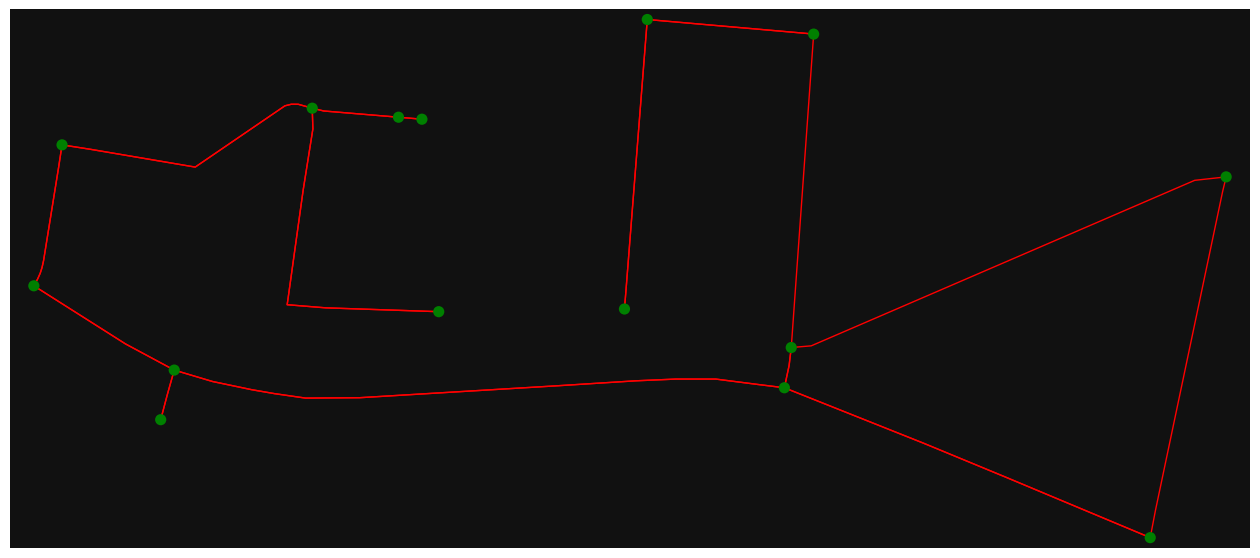

(<Figure size 1600x1600 with 1 Axes>, <Axes: >)

In [6]:
ox.plot_graph(G, figsize=(16, 16), save=True, filepath='./input_data/map.png', dpi=600, node_color='g', edge_color='r', node_size=65)

In [6]:
G.adj[236160006][264345061][0]

{'osmid': 24345907,
 'highway': 'residential',
 'lanes': '2',
 'maxspeed': '50',
 'name': 'Miechowska',
 'oneway': False,
 'reversed': True,
 'length': np.float64(22.119597424091033),
 'geometry': <LINESTRING (19.914 50.068, 19.914 50.068, 19.914 50.067)>}

In [7]:
G.adj[236160006][264345061][0]

{'osmid': 24345907,
 'highway': 'residential',
 'lanes': '2',
 'maxspeed': '50',
 'name': 'Miechowska',
 'oneway': False,
 'reversed': True,
 'length': np.float64(22.119597424091033),
 'geometry': <LINESTRING (19.914 50.068, 19.914 50.068, 19.914 50.067)>}

In [8]:
G.nodes[236160006]

{'y': 50.0676446, 'x': 19.9144835, 'street_count': 3}

In [9]:
for i in set(G.successors(495649052)) | set(G.predecessors(495649052)):
    print(i)

print(G.edges)

print(G.adj[273461469][236160072])

(set(map(lambda x: x[1], list(nx.bfs_edges(G, 273461469)))) | set([273461469])) == set(G.nodes)

set(G.nodes)


495649040
495649054
[(236160006, 264345061, 0), (236160006, 236306981, 0), (236160006, 236160072, 0), (236160072, 267538595, 0), (236160072, 273461469, 0), (236160072, 236160006, 0), (236306981, 236160006, 0), (236306981, 281474610, 0), (264345061, 236160006, 0), (267538595, 273461466, 0), (267538595, 236160072, 0), (273461469, 273461466, 0), (273461469, 236160072, 0), (281474610, 236306981, 0), (281474610, 281474691, 0), (281474691, 281474610, 0), (281474691, 3044475380, 0), (281474691, 3376781934, 0), (495649040, 495649052, 0), (495649040, 273461469, 0), (495649052, 495649054, 0), (495649052, 495649040, 0), (495649054, 495649052, 0), (3044475380, 281474691, 0), (3376781933, 3376781934, 0), (3376781934, 3376781933, 0), (3376781934, 281474691, 0)]
{0: {'osmid': 178067341, 'highway': 'residential', 'lanes': '2', 'maxspeed': '50', 'name': 'Urzędnicza', 'oneway': False, 'reversed': False, 'length': np.float64(17.58251982326308), 'geometry': <LINESTRING (19.918 50.068, 19.918 50.068, 19.91

{236160006,
 236160072,
 236306981,
 264345061,
 267538595,
 273461466,
 273461469,
 281474610,
 281474691,
 495649040,
 495649052,
 495649054,
 3044475380,
 3376781933,
 3376781934}

In [10]:
tuple(G.nodes)

(236160006,
 236160072,
 236306981,
 264345061,
 267538595,
 273461466,
 273461469,
 281474610,
 281474691,
 495649040,
 495649052,
 495649054,
 3044475380,
 3376781933,
 3376781934)

In [11]:
T = nx.bfs_tree(G, 236160006)

In [12]:
len(T.edges())

11

In [13]:
len(T.nodes())

12

In [14]:
G.adj[236160006][264345061][0]

{'osmid': 24345907,
 'highway': 'residential',
 'lanes': '2',
 'maxspeed': '50',
 'name': 'Miechowska',
 'oneway': False,
 'reversed': True,
 'length': np.float64(22.119597424091033),
 'geometry': <LINESTRING (19.914 50.068, 19.914 50.068, 19.914 50.067)>}

In [15]:
sum(map(lambda x: G.adj[x[0]][x[1]][0]['length'], T.edges()))

np.float64(1080.5924327610455)

In [16]:
import random
def get_all_node_ids(graph):
  return list(graph.nodes)

def bfs_shortest_path(graph, source, target):
  return nx.shortest_path(graph, source=source, target=target, weight='length')

node_1 = sample(list(G.nodes), 1)[0]
node_2 = sample(list(G.nodes), 1)[0]
# print(node_1, node_2)
# path = bfs_shortest_path(G, node_1, node_2)
# print(path)

def generate_vehicles(start_time, end_time, probability):
    vehicles = []
    types = ['car', 'bus', 'truck', 'motorcycle']
    idx = 0
    for i in range(start_time, end_time):
        if random.random() < probability:
            start_node = sample(list(G.nodes), 1)[0]
            end_node = sample(list(G.nodes), 1)[0]
            try:
              path = bfs_shortest_path(G, start_node, end_node)
            except: # Path not found
              print(f'cannot find path between {start_node} and {end_node}')
              continue
            
            if not path:
                continue
            
            # Randomly select a vehicle type
            vehicle_type = random.choice(types)
            vehicle = {
                'id': idx,
                'type': vehicle_type,
                'start_time': i,
                'from_node': start_node,
                'to_node': end_node,
                'path': path
            }
            idx += 1

            vehicles.append(vehicle)
    return vehicles

vehicles = generate_vehicles(0, 100, 0.1)
for vehicle in vehicles:
    print(vehicle)

cannot find path between 3376781933 and 495649052
cannot find path between 273461466 and 273461469
{'id': 0, 'type': 'bus', 'start_time': 3, 'from_node': 495649052, 'to_node': 3044475380, 'path': [495649052, 495649040, 273461469, 236160072, 236160006, 236306981, 281474610, 281474691, 3044475380]}
{'id': 1, 'type': 'motorcycle', 'start_time': 4, 'from_node': 273461469, 'to_node': 3376781933, 'path': [273461469, 236160072, 236160006, 236306981, 281474610, 281474691, 3376781934, 3376781933]}
{'id': 2, 'type': 'motorcycle', 'start_time': 23, 'from_node': 495649054, 'to_node': 3044475380, 'path': [495649054, 495649052, 495649040, 273461469, 236160072, 236160006, 236306981, 281474610, 281474691, 3044475380]}
{'id': 3, 'type': 'car', 'start_time': 27, 'from_node': 3376781933, 'to_node': 236306981, 'path': [3376781933, 3376781934, 281474691, 281474610, 236306981]}
{'id': 4, 'type': 'bus', 'start_time': 34, 'from_node': 281474691, 'to_node': 264345061, 'path': [281474691, 281474610, 236306981, 

In [11]:
G_di = nx.DiGraph(G)

In [12]:
G_di.nodes

NodeView((236160006, 236160072, 236306981, 264345061, 267538595, 273461466, 273461469, 281474610, 281474691, 495649040, 495649052, 495649054, 3044475380, 3376781933, 3376781934))

In [13]:
G_di.edges

OutEdgeView([(236160006, 264345061), (236160006, 236306981), (236160006, 236160072), (236160072, 267538595), (236160072, 273461469), (236160072, 236160006), (236306981, 236160006), (236306981, 281474610), (264345061, 236160006), (267538595, 273461466), (267538595, 236160072), (273461469, 273461466), (273461469, 236160072), (281474610, 236306981), (281474610, 281474691), (281474691, 281474610), (281474691, 3044475380), (281474691, 3376781934), (495649040, 495649052), (495649040, 273461469), (495649052, 495649054), (495649052, 495649040), (495649054, 495649052), (3044475380, 281474691), (3376781933, 3376781934), (3376781934, 3376781933), (3376781934, 281474691)])

In [15]:
G_di.edges[236160006, 264345061]

{'osmid': 24345907,
 'highway': 'residential',
 'lanes': '2',
 'maxspeed': '50',
 'name': 'Miechowska',
 'oneway': False,
 'reversed': True,
 'length': np.float64(22.119597424091033),
 'geometry': <LINESTRING (19.914 50.068, 19.914 50.068, 19.914 50.067)>}

In [16]:
G_di.edges[264345061, 236160006]

{'osmid': 24345907,
 'highway': 'residential',
 'lanes': '2',
 'maxspeed': '50',
 'name': 'Miechowska',
 'oneway': False,
 'reversed': False,
 'length': np.float64(22.119597424091033),
 'geometry': <LINESTRING (19.914 50.067, 19.914 50.068, 19.914 50.068)>}

In [22]:
type(G_di.edges[264345061, 236160006]['geometry'])

shapely.geometry.linestring.LineString

In [27]:
for edge in G_di.edges:
    print(edge)
    print(type(G_di.edges[*edge]['geometry']))

(236160006, 264345061)
<class 'shapely.geometry.linestring.LineString'>
(236160006, 236306981)
<class 'shapely.geometry.linestring.LineString'>
(236160006, 236160072)
<class 'shapely.geometry.linestring.LineString'>
(236160072, 267538595)
<class 'shapely.geometry.linestring.LineString'>
(236160072, 273461469)
<class 'shapely.geometry.linestring.LineString'>
(236160072, 236160006)
<class 'shapely.geometry.linestring.LineString'>
(236306981, 236160006)
<class 'shapely.geometry.linestring.LineString'>
(236306981, 281474610)
<class 'shapely.geometry.linestring.LineString'>
(264345061, 236160006)
<class 'shapely.geometry.linestring.LineString'>
(267538595, 273461466)
<class 'shapely.geometry.linestring.LineString'>
(267538595, 236160072)
<class 'shapely.geometry.linestring.LineString'>
(273461469, 273461466)
<class 'shapely.geometry.linestring.LineString'>
(273461469, 236160072)
<class 'shapely.geometry.linestring.LineString'>
(281474610, 236306981)
<class 'shapely.geometry.linestring.LineS

KeyError: 'geometry'

In [28]:
G_di.edges[(3376781933, 3376781934)]

{'osmid': 330685750,
 'highway': 'residential',
 'lanes': '1',
 'oneway': False,
 'reversed': True,
 'length': np.float64(10.114138764229109)}

In [30]:
G_di.nodes[3376781933]

{'y': 50.0686155, 'x': 19.9159768, 'street_count': 1}

In [31]:
G_di.nodes[3376781934]

{'y': 50.0686232, 'x': 19.9158356, 'street_count': 3}

In [ ]:
from shapely import LineString

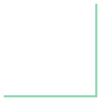

In [34]:
from shapely import LineString
a = LineString([[0, 0], [1, 0], [1, 1]])
a